<a href="https://colab.research.google.com/github/JBSspc/PracticasComputacionII/blob/main/Parcial2SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computación II**
## Parcial 2

Sofía Palacios Cuevas

### **Importar datos**

Usar año y número de personas



In [ ]:
import pandas as pd # para importar los datos
from google.colab import files # para descargar .csv's

# importamos desde la url
datos = pd.read_csv (r'https://raw.githubusercontent.com/ulises1229/CompII_2022-2/3efdc8f8a51f58fca9c386b50387cfced018d5bb/data/population-growth-the-annual-change-of-the-population%20(4).csv') 
#print (datos) # vemos si funciona

# comenzaremos a importar los datos de 'Mexico'
df = pd.DataFrame(datos) # creamos un dataframe
Mdf = df[df['Entity'] == 'Mexico'] # Seleccionamos aquellos registros donde 
                                   # 'Entidad' = 'Mexico'

#print(Mdf)

#yMdf = Mdf[['Year']]
#eMdf = Mdf[['"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Population change (thousands)"']]
#print(Mdf)
xMdf = Mdf.Year
yMdf = Mdf.iloc[:,[3]]
print(xMdf)
print(yMdf)


xMdf.to_csv('xMdf.csv')
yMdf.to_csv('yMdf.csv')
#files.download('xMdf.csv')
files.download('yMdf.csv')

21000    1950
21001    1951
21002    1952
21003    1953
21004    1954
         ... 
21145    2095
21146    2096
21147    2097
21148    2098
21149    2099
Name: Year, Length: 150, dtype: int64
       Estimates, 1950 - 2020: Annually interpolated demographic indicators - Population change (thousands)
21000                                           793823.0                                                   
21001                                           822536.0                                                   
21002                                           859311.0                                                   
21003                                           899043.0                                                   
21004                                           940660.0                                                   
...                                                  ...                                                   
21145                                               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Polinomio Interpolación Lagrange**

-178.666666666686*x**3 + 1047750.5*x**2 - 2048056575.83398*x + 1334430836415.0


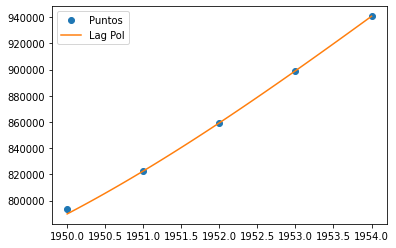

In [75]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


xi = np.array([1950, 1951, 1952, 1953, 1954])
yi = np.array([793823.0, 822536.0,  859311.0, 899043.0, 940660.0])
n = len(xi)

x = sym.Symbol('x')
yp = 0
for i in range(1,n):
  p = 1
  for j in range(1,n):
    if i != j:
      p = p*(x -xi[j])/(xi[i] - xi[j])
      
  yp = yp + p*yi[i]
  ypsimple = yp.expand()
  # print(yp)
print(ypsimple)
xp = sym.lambdify(x, ypsimple)
m = 101
a = np.min(xi)
b = np.max(xi)

xpi = np.linspace(a,b,m)
ypi = xp(xpi)

plt.plot(xi, yi, 'o', label = 'Puntos')
plt.plot(xpi, ypi, label= "Lag Pol")
plt.legend()
plt.show()


### Regresión Lineal

Calculated coef: 
 b0 = -71396256.60000001
 b1 = 37018.1


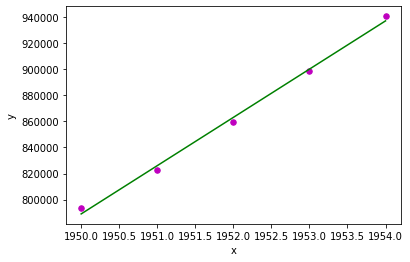

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinealRegression():
  def calculateCoef(self, x,y):
    n = np.size(x)

    #====== por partes
    # promedios
    mx = np.mean(x)
    my = np.mean(y)

    crossDev_xy = np.sum(y*x) - n*my*mx
    crossDev_xx = np.sum(x*x) - n*mx*mx

    b1 = crossDev_xy / crossDev_xx
    b0 = my - b1*mx

    return (b0, b1)
  
  def plotRegLine(self,x,y,b):
    plt.scatter(x,y, color = "m", marker = "o", s = 30)

    yPredicted = b[0] + b[1]*x

    plt.plot(x,yPredicted, color = "g")

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

def main():
  x = np.array([1950, 1951, 1952, 1953, 1954])
  y = np.array([793823.0, 822536.0,  859311.0, 899043.0, 940660.0])
  
  LR = LinealRegression()
  b = LR.calculateCoef(x,y)
  print("Calculated coef: \n b0 = " + str(b[0]) + "\n b1 = " + str(b[1]))

  LR.plotRegLine(x,y,b)

if __name__ == "__main__":
  main()

#### **Resultados**
La interpolación por el método de Lagrange aproximó mejor los valores del crecimeinto poblacional. No tuve tiempo de calcular el error. Tuve que dejarlo con 4 puntos porque sino, tardaba mucho.
Abajo se encuentras las gráficas. 
Lagrange:
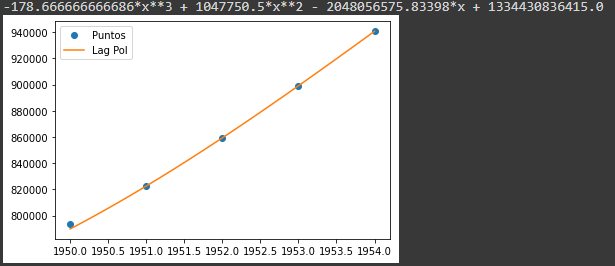
</br>
Regresión lineal:
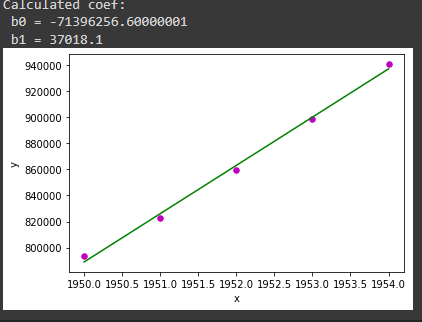
